In [ ]:
#library imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist

#load the MNIST dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data();

#Normalize the data
X_train = X_train/255.0
X_test = X_test/255.0

#Reshape the data to one diminsion
X_train = X_train.reshape(X_train.shape[0],28*28)
X_test = X_test.reshape(X_test.shape[0],28*28)


#Parse the output data
Y_train = tf.keras.utils.to_categorical(Y_train,10)
Y_test = tf.keras.utils.to_categorical(Y_test,10)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
#define the model archteciture
model = Sequential([
    Dense(100, activation = 'sigmoid', input_shape=(28*28, )),
    Dense(10,activation='sigmoid')
])

#Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#train the model
history = model.fit(X_train, Y_train, batch_size=120, epochs=50, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/50
500/500 [==============================] - 4s 5ms/step - loss: 0.6186 - accuracy: 0.8569 - val_loss: 0.3122 - val_accuracy: 0.9170
Epoch 2/50
500/500 [==============================] - 3s 6ms/step - loss: 0.2782 - accuracy: 0.9227 - val_loss: 0.2389 - val_accuracy: 0.9317
Epoch 3/50
500/500 [==============================] - 2s 3ms/step - loss: 0.2197 - accuracy: 0.9379 - val_loss: 0.1969 - val_accuracy: 0.9428
Epoch 4/50
500/500 [==============================] - 2s 4ms/step - loss: 0.1841 - accuracy: 0.9483 - val_loss: 0.1717 - val_accuracy: 0.9500
Epoch 5/50
500/500 [==============================] - 2s 4ms/step - loss: 0.1582 - accuracy: 0.9551 - val_loss: 0.1538 - val_accuracy: 0.9549
Epoch 6/50
500/500 [==============================] - 2s 4ms/step - loss: 0.1391 - accuracy: 0.9605 - val_loss: 0.1393 - val_accuracy: 0.9586
Epoch 7/50
500/500 [==============================] - 2s 3ms/step - loss: 0.1231 - accuracy: 0.9650 - val_loss: 0.1297 - val_accuracy: 0.9628
Epoch 

In [ ]:
#Evaluate the model
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test Accuracy:', round(score[1]*100, 2), '%')

Test Accuracy: 97.76 %


In [ ]:
# imports
import tensorflow as tf
import numpy as np

# Load a single handwritten digit image and preprocess the data
img = tf.keras.preprocessing.image.load_img('digit-7.jpg', color_mode='grayscale', target_size=(28, 28))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = img_array/255.0
img_array = img_array.reshape(1, 28*28)
img_array = 1 - img_array

# Use our trained model to predict!!
prediction = model.predict(img_array, verbose=0)
digit = np.argmax(prediction)

# Print the result!
print('----------------------------')
print('Network Prediction:', digit)
print('----------------------------\n')

print('----------------------------')
print('Network Output Activations')
print('----------------------------')
for i in range(10): print(i, ':', round(prediction[0][i], 3))
print('----------------------------')

----------------------------
Network Prediction: 7
----------------------------

----------------------------
Network Output Activations
----------------------------
0 : 0.0
1 : 0.0
2 : 0.913
3 : 0.116
4 : 0.011
5 : 0.0
6 : 0.0
7 : 1.0
8 : 0.003
9 : 0.0
----------------------------


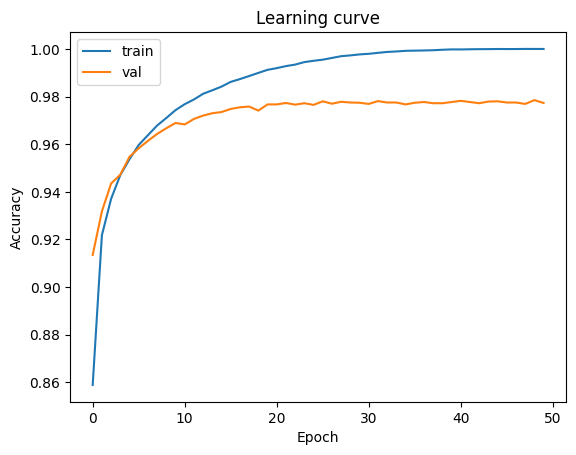

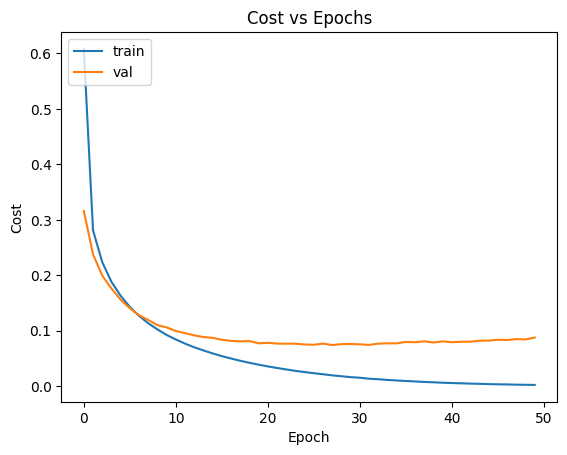

In [ ]:
import matplotlib.pyplot as plt

# Plot the accuracy against the epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Learning curve')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plot the cost against the epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Cost vs Epochs')
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
